In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
images=tf.data.Dataset.list_files('data-2\\*.jpeg')

In [3]:
images.as_numpy_iterator().next()

b'data-2\\img-65.jpeg'

In [4]:
def load_image(path):
    byte_img=tf.io.read_file(path)
    img=tf.image.decode_jpeg(byte_img)
    return img

In [5]:
images=images.map(load_image)

In [6]:
images.as_numpy_iterator().next()

array([[[ 89, 117,  76],
        [ 89, 117,  76],
        [ 89, 117,  76],
        ...,
        [ 93, 125,  84],
        [ 93, 125,  84],
        [ 93, 125,  84]],

       [[ 89, 117,  76],
        [ 89, 117,  76],
        [ 90, 118,  77],
        ...,
        [ 94, 126,  85],
        [ 94, 126,  85],
        [ 94, 126,  85]],

       [[ 90, 118,  77],
        [ 90, 118,  77],
        [ 91, 119,  78],
        ...,
        [ 96, 128,  87],
        [ 96, 128,  87],
        [ 96, 128,  87]],

       ...,

       [[ 96, 110,  84],
        [ 95, 109,  83],
        [ 97, 111,  85],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[ 92, 106,  80],
        [ 96, 110,  84],
        [101, 115,  89],
        ...,
        [ 11,  11,  13],
        [  8,   8,  10],
        [  2,   2,   4]],

       [[ 98, 112,  86],
        [106, 120,  94],
        [112, 126, 100],
        ...,
        [  1,   1,   3],
        [  0,   0,   2],
        [  3,   3,   5]]

In [7]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [8]:
image_generator=images.batch(1).as_numpy_iterator()

In [11]:
plot_images=image_generator.next()

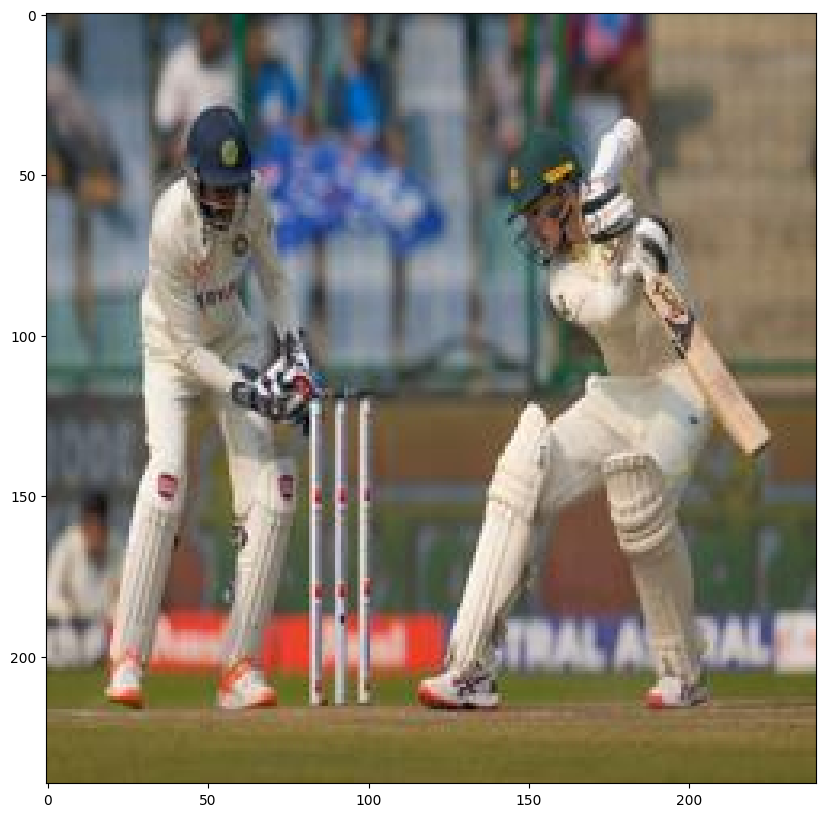

In [12]:
fig ,ax =plt.subplots(ncols=1 ,figsize=(10,10))
for image in plot_images:
    ax.imshow(image)
plt.show()

In [123]:
# image augumentation for the data
import albumentations as alb
augmentor = alb.Compose([alb.RandomCrop(width=225, height=225), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [124]:
import cv2
import os

In [125]:
img = cv2.imread(os.path.join('data-2','img-10.jpeg'))

In [126]:
label=open(os.path.join('data','img-10.json'),'r')
label=json.load(label)

In [127]:
label

{'version': '5.2.1',
 'flags': {},
 'shapes': [{'label': '1',
   'points': [[74.58115183246075, 16.596858638743463],
    [83.48167539267017, 27.853403141361262]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\data-2\\img-10.jpeg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADwAPADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVl

In [128]:
# extracting the cordinates from the labels
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [129]:
coords = list(np.divide(coords, [225, 225, 225, 225]))

In [130]:
coords

[0.3314717859220478,
 0.07376381617219317,
 0.3710296684118674,
 0.1237929028504945]

In [131]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['1'])

In [132]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

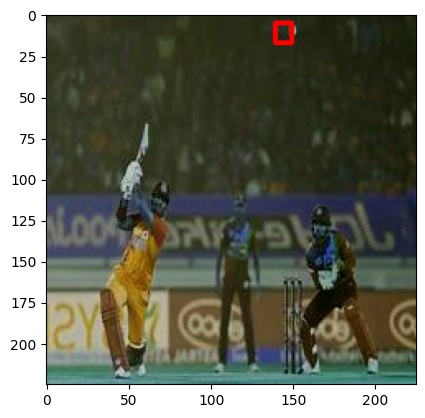

In [133]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [225,225]).astype(int)),
              # untransforming the bounding box
              tuple(np.multiply(augmented['bboxes'][0][2:], [225,225]).astype(int)),
              (255,0,0), 2)

plt.imshow(augmented['image'])

In [135]:
#doing all that for all image in the dataset
for image in os.listdir(os.path.join('data-2')):
    img = cv2.imread(os.path.join('data-2',image))
    coords = [0,0,0,0]
    label_path = os.path.join('data',image.split('.')[0]+'.json')
    if os.path.exists(label_path):
        label=open(label_path,'r')
        label=json.load(label)
        coords[0] = label['shapes'][0]['points'][0][0]
        coords[1] = label['shapes'][0]['points'][0][1]
        coords[2] = label['shapes'][0]['points'][1][0]
        coords[3] = label['shapes'][0]['points'][1][1]
        coords = list(np.divide(coords, [label['imageWidth'],label['imageHeight'],label['imageWidth'],label['imageHeight']]))
    try: 
            for x in range(60):
                augmentor = alb.Compose([alb.RandomCrop(width=label['imageWidth'], height=label['imageHeight']), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['1'])
                cv2.imwrite(os.path.join('augdata','train','images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('augdata','train','labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

    except Exception as e:
        print(e)

x_max is less than or equal to x_min for bbox [0, 0, 0, 0, '1'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, '1'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, '1'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, '1'].
